In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import metrics

from k_mean import k_mean

In [2]:
iris = load_iris()
data = pd.DataFrame(iris['data'])
data.columns = iris['feature_names']
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
def dist_Euc(row1, row2):
    """ Calculates Euclidean distance between two points 
    
    Args: 
        row1, row2: iterable number objects of equal lenth
    """
    s = 0
    for a1, a2 in zip(row1, row2):
        s += (a1 - a2) ** 2
    return s ** 0.5

In [4]:
clusters = k_mean(data=data, dist=dist_Euc, n_clus=3, verbose=1)
# clusters = clusters.map(lambda x: "cls:{}".format(x))

Current sum distance: 13.471210566014527
Current sum distance: 13.870982927678329
Current sum distance: 1.6721676919241615
Current sum distance: 0.10168469003431857
Current sum distance: 0.034363337811612216
Current sum distance: 0.0


In [5]:
print(metrics.homogeneity_score(iris['target'], clusters))
print(metrics.completeness_score(iris['target'], clusters))

0.5793801642856945
0.7357206243754478


In [6]:
pca = PCA(n_components=3)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
data_pca = pd.DataFrame(index=data.index)
pca.fit(data)
data_pca['x'] = pca.transform(data)[:, 0]
data_pca['y'] = pca.transform(data)[:, 1]

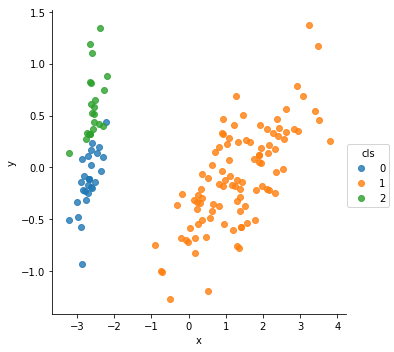

In [8]:
# draw scatter plot of dataset
plt_data = data_pca.copy()
plt_data['cls'] = clusters

sns.lmplot(data=plt_data, hue='cls', x="x", y="y", size = 5, fit_reg=False)

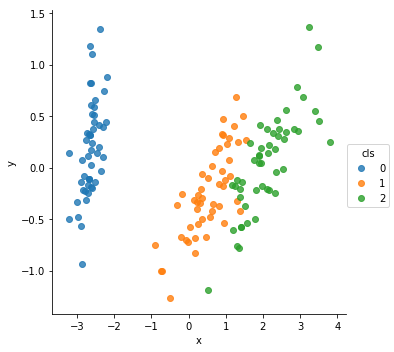

In [9]:
plt_data = data_pca.copy()
plt_data['cls'] = pd.Series(iris['target'])

sns.lmplot(data=plt_data, hue='cls', x="x", y="y", size = 5, fit_reg=False)

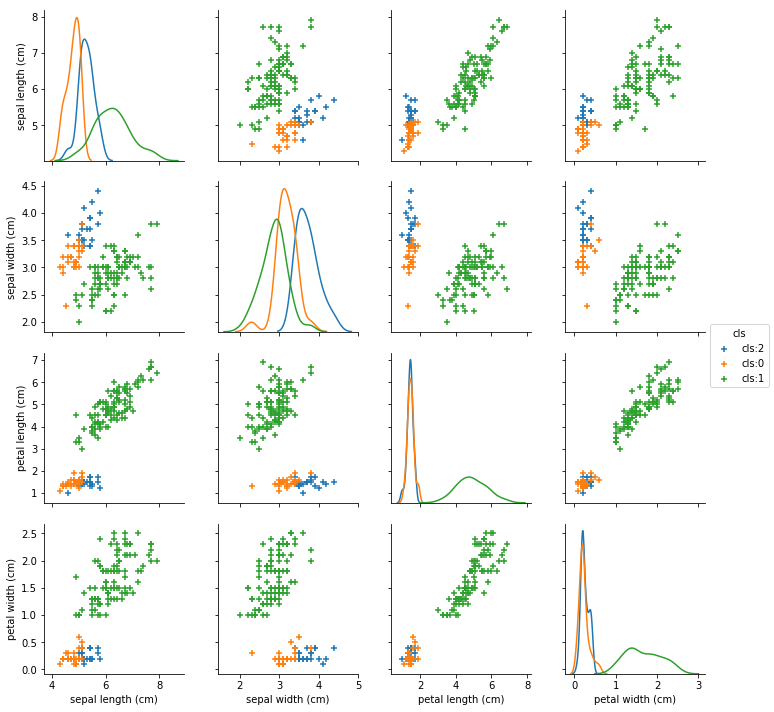

In [10]:
plt_data = data.copy()
plt_data['cls'] = clusters.map(lambda x: f"cls:{x}")
sns.pairplot(plt_data, hue='cls', diag_kind="kde", markers="+")